# Main Pipeline Notebook

## TJAnalytix Pipeline - Topic Modeling and Sentiment Analysis

This master notebook serves as the central controller for executing the entire
workflow for the TJAnalytix sentiment analysis workflow. This sequentially runs
all modular notebooks that correspond to the key phases of the project
including:

1. Data Acquisition - Calling the Reddit API to acquire data.
2. Raw Exploratory Data Analysis - Performing EDA on the acquired raw data.
3. Data Cleaning and EDA - Cleaning raw data and performing EDA on cleaned data.
4. Topic Modeling - Perform Topic Modeling and Sentiment Analysis on the cleaned data.

Each phase in encapsulated in a standalone notebook to ensure clarity,
modularity, and reusability. This master notebook orchestrates these steps
using Jupyter's `%run` magic commend, ensuring that all phases execute in a
logical, reproducible order.


## Set Pipeline Variables and Import Libraries

This section will set the global pipeline variables and import the required
libraries to run this master notebook.


In [12]:
# set pipeline variable
IS_PIPELINE_RUN = True
%store IS_PIPELINE_RUN

IS_PIPELINE_TEST = False 
%store IS_PIPELINE_TEST

Stored 'IS_PIPELINE_RUN' (bool)
Stored 'IS_PIPELINE_TEST' (bool)


In [13]:
# import libraries
from pathlib import Path

# set dataset folder location
dataset_folder = Path("../datasets")

# Data Acquisition

This section will check if the data files necessary to run the pipeline
already exist. If it does not exist, it will run the data acquisition notebook
and create the files required to continue the pipeline.


In [14]:
# check if pipeline files exist
# if run the acquisition notebook if it does not exist
expected_files = [
    Path("../datasets/Palo_Alto_pipeline_reddit.pkl"),
    Path("../datasets/Oklahoma_City_pipeline_reddit.pkl"),
]

if not all(p.exists() for p in expected_files):
    print("Performing data acquisition.")
    get_ipython().run_line_magic("run", "./01_data_scraping_reddit.ipynb")
else:
    print("All files necessary to execute the pipeline exist.")
    print("Data acquisition skipped...")

All files necessary to execute the pipeline exist.
Data acquisition skipped...


# Raw Data - Exploratory Data Analysis

This section performs exploratory data analysis on the raw data acquired
for the pipeline.


Performing EDA on Raw Data
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 82 entries, 0 to 81
Data columns (total 7 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   source           82 non-null     object
 1   query            82 non-null     object
 2   topic            82 non-null     object
 3   comments_nested  82 non-null     object
 4   comments_flat    82 non-null     object
 5   num_comments     82 non-null     int64 
 6   total_words      82 non-null     int64 
dtypes: int64(2), object(5)
memory usage: 4.6+ KB


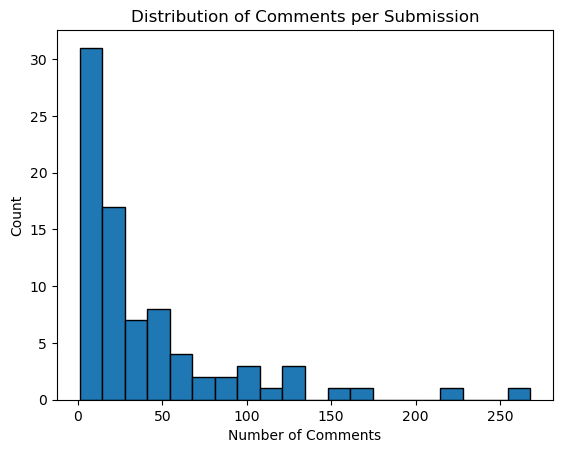

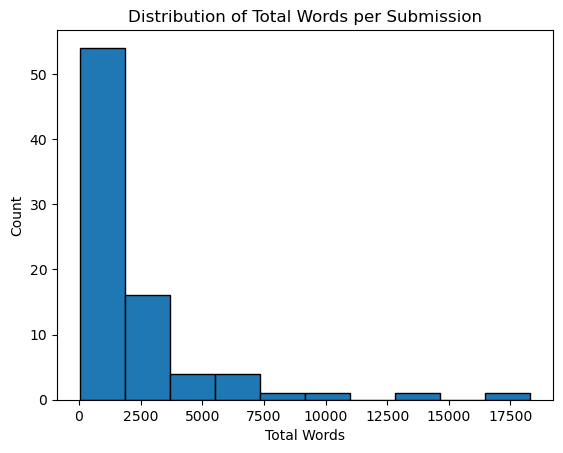

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 136 entries, 0 to 135
Data columns (total 7 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   source           136 non-null    object
 1   query            136 non-null    object
 2   topic            136 non-null    object
 3   comments_nested  136 non-null    object
 4   comments_flat    136 non-null    object
 5   num_comments     136 non-null    int64 
 6   total_words      136 non-null    int64 
dtypes: int64(2), object(5)
memory usage: 7.6+ KB


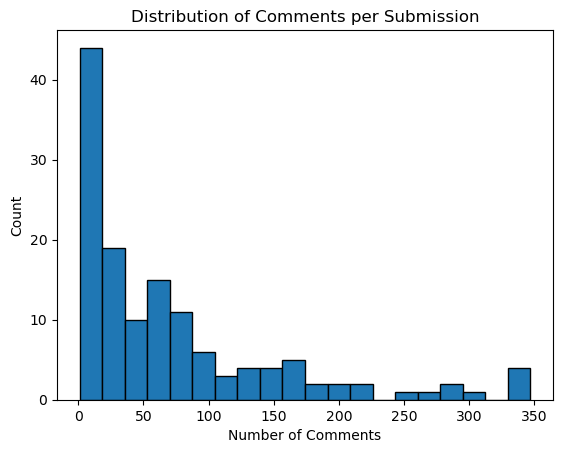

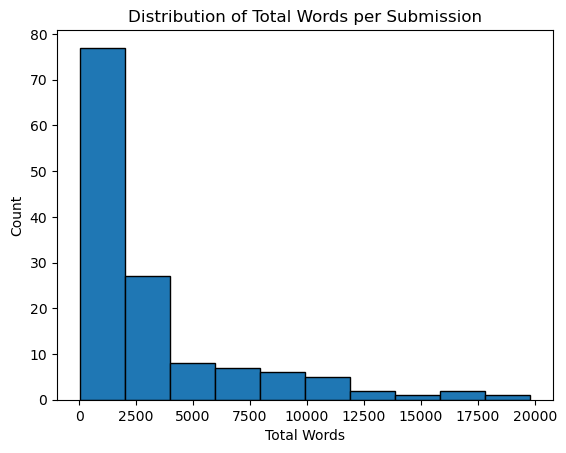

In [15]:
print("Performing EDA on Raw Data")
%run ./02_eda_raw.ipynb

# Data Cleaning and EDA

This section performs data cleaning on the acquired data.
Exploratory Data Analysis is also performed on the cleaned data.


In [16]:
print("Performing Data Cleaning and Saving Cleaned Data")
%run ./03_eda.ipynb

Performing Data Cleaning and Saving Cleaned Data
dataset1: 82 posts
dataset2: 136 posts
dataset1:
  Total posts: 82
  Total comments: 3331
  Average comment length: 28.0 words
  Total tokens: 92053

dataset2:
  Total posts: 136
  Total comments: 9953
  Average comment length: 21.9 words
  Total tokens: 225733

dataset1:
     word  count
0  people    756
1    like    692
2  school    682
3     get    522
4   would    497

dataset2:
     word  count
0    like   2071
1  people   1654
2     one   1324
3   would   1300
4     get   1160

✅ Saved dataset1 → Palo_Alto_cleaned_pipeline_reddit.pkl
✅ Saved dataset2 → Oklahoma_City_cleaned_pipeline_reddit.pkl


# Topic Modeling and Sentiment Analysis

This section performed topic modeling and sentiment analysis on the cleaned
data acquired from the previous notebook.


Performing Topic Modeling
Loading dataset from: ../datasets/Palo_Alto_cleaned_pipeline_reddit.pkl
✅ Dataset loaded successfully.
Shape: (82, 11)
Using 82 documents for topic modeling.
Document-term matrix shape: (82, 5537)

🟢 Topic 1:
jewish, california, people, like, think, map, bay, states, water, area

🟢 Topic 2:
people, like, think, know, really, time, dont, scott, women, good

🟢 Topic 3:
school, kids, schools, high, like, parents, people, good, don, bay

🟢 Topic 4:
people, portland, like, jazz, stanford, make, really, school, money, student

🟢 Topic 5:
like, students, people, years, make, time, school, work, dont, nyc


/tmp/ipykernel_762131/2597249984.py:49: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x="dominant_topic", data=df, palette="viridis")


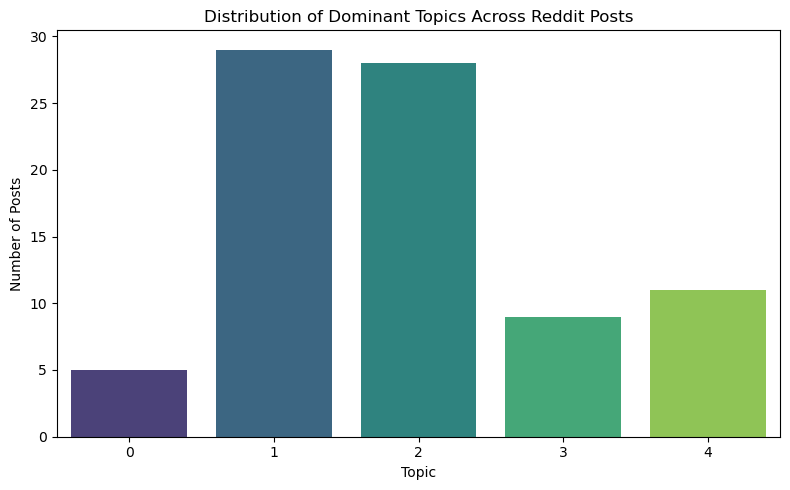


🧩 Topic 0 Example Posts:
Example 1: bohemian grove prevalent enough make map even drew owl course napa produced grape juice 1920 1933  idea dumbarton bridge older golden gate bay bridge 🤯 ha two women representing mills college fun look back history luther burbank getting cred experimental farm hoot 😂😂😂 bridges 🌫️🌁🌫️🌉 bay bridge yet e...

Example 2: nearly unbroken stretch protestors along el camino palo alto tesla sunnyvale 7 miles actually protest el camino real today 7 miles long stretched palo alto sunnyvale beyond clarification protest stretched part palo alto sunnyvale another protest started embarcadero el camino real turned walking marc...


🧩 Topic 1 Example Posts:
Example 1: almost schools funded public rather whims megarich something clout taxes think wife would better looks like they’re bird feather good know theyre pieces shit hope trump comes anyway appologize dumb question public school would receiving title 1 federal funding crazy whole school shut one guy stops f...



,Topic,Top Words
0,1,"jewish, california, people, like, think, map, bay, states, water, area"
1,2,"people, like, think, know, really, time, dont, scott, women, good"
2,3,"school, kids, schools, high, like, parents, people, good, don, bay"
3,4,"people, portland, like, jazz, stanford, make, really, school, money, student"
4,5,"like, students, people, years, make, time, school, work, dont, nyc"



🟩 Oklahoma City Topics:


,Topic,Top Words
0,1,"like, team, game, nba, player, year, think, really, time, players"
1,2,"like, work, years, people, job, time, atc, im, think, know"
2,3,"people, like, think, know, time, really, dont, family, remember, got"
3,4,"people, like, think, im, dont, state, want, vote, know, school"
4,5,"like, people, kobe, live, years, house, school, im, tornado, home"


/tmp/ipykernel_762131/3312971749.py:86: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(ax=axes[0], x="dominant_topic", data=palo_df, palette="Blues")
/tmp/ipykernel_762131/3312971749.py:91: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(ax=axes[1], x="dominant_topic", data=okc_df, palette="Greens")


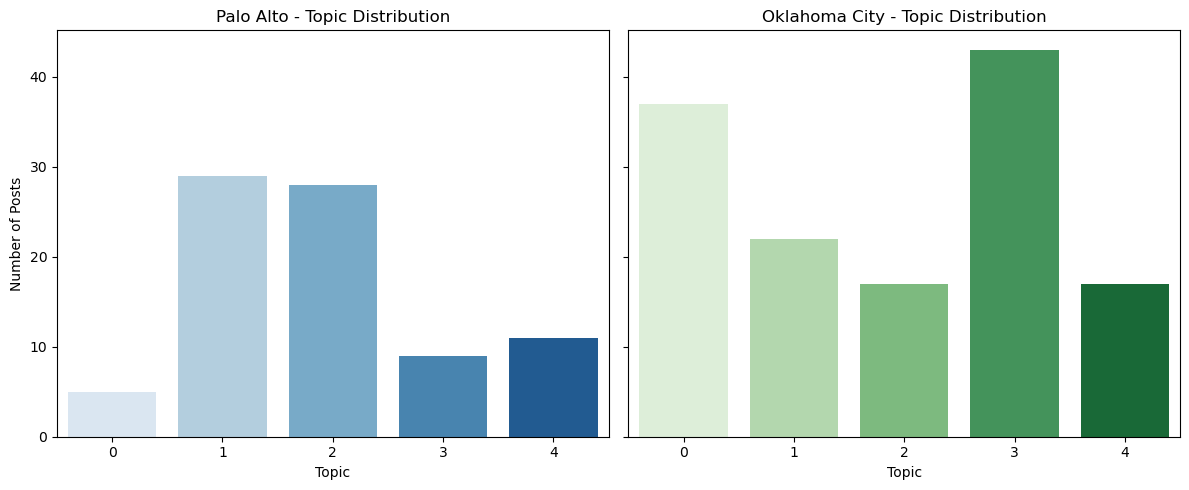

,District,Posts,Top Topic IDs
0,Palo Alto,82,1
1,Oklahoma City,136,3


[nltk_data] Downloading package vader_lexicon to
[nltk_data]     /home/junc/nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!
/tmp/ipykernel_762131/780126870.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x="sentiment_label", data=df, palette="coolwarm")


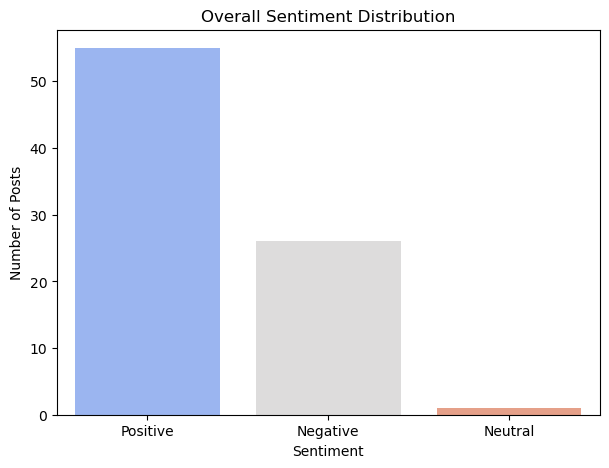

/tmp/ipykernel_762131/780126870.py:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x="dominant_topic", y="sentiment_score", data=df, palette="viridis")


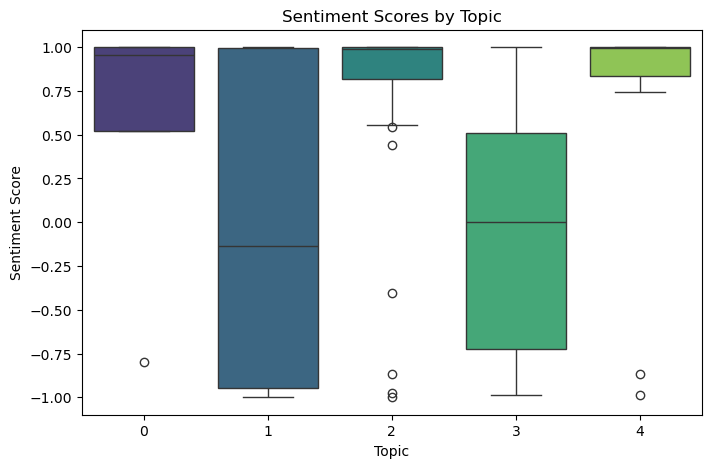

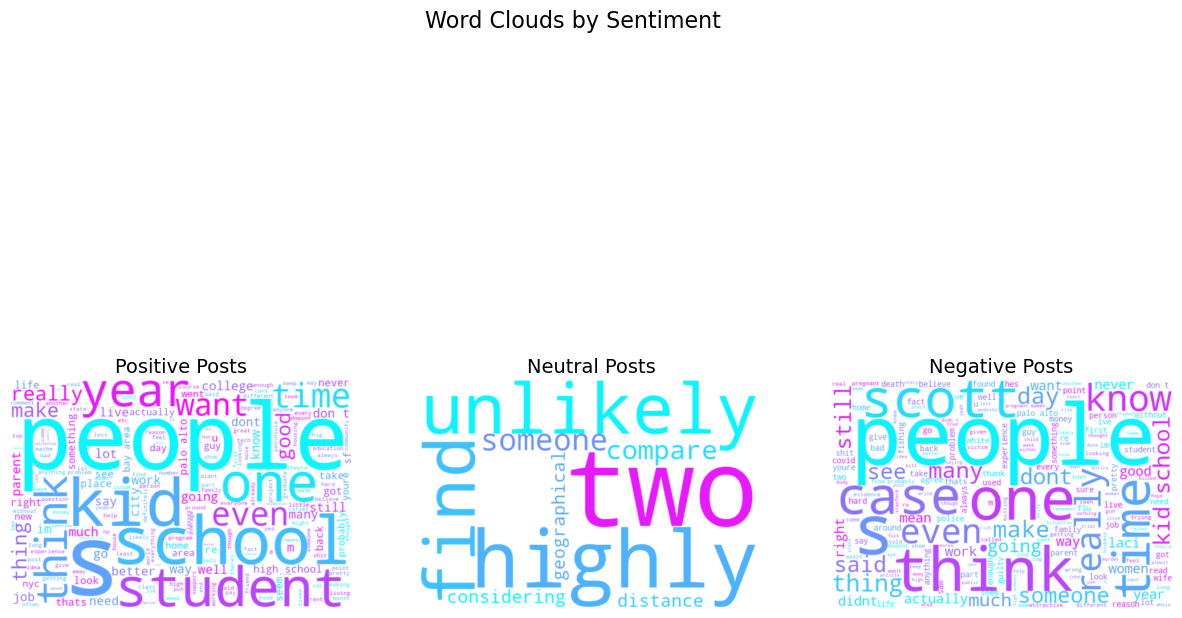

In [17]:
print("Performing Topic Modeling")
%run ./04_topic_modeling.ipynb